<a href="https://colab.research.google.com/github/peta-m175/rabbit_challenge/blob/master/deep_learning/day3/lstm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LSTM

RNNの課題
- 時系列を遡れば遡るほど、勾配が消失していく
  - 長い時系列の学習が困難

解決策
  - 勾配消失の解決方法とは、別で、構造自体を変えて解決したものがLSTM

勾配爆発\
勾配が、層を逆伝播するごとに指数関数的に大きくなっていく。

## LSTMイメージ

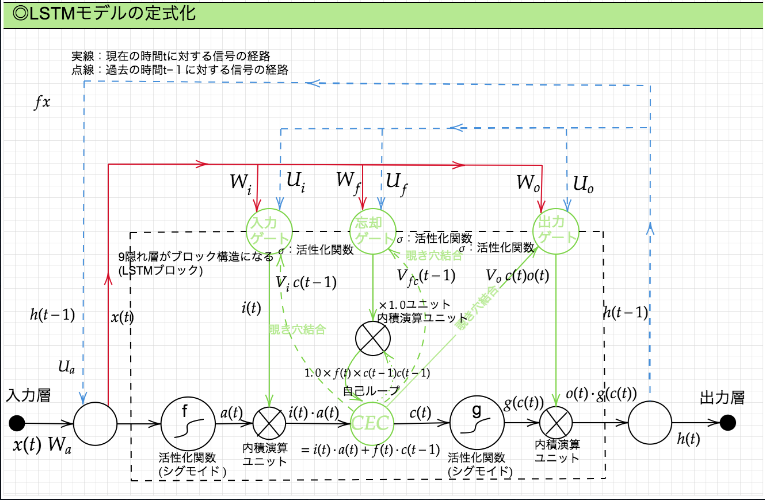

## CEC

勾配消失および勾配爆発の解決方法として、勾配が、1であれば解決できる。
$$
\delta^{t-z-1}=\delta^{t-z}\left\{
  Wf'(u^{t-z-1})
  \right\} = 1 \\
\frac{\partial E}{\partial c^{t-1}}
=\frac{\partial E}{\partial c^t}\frac{\partial c^t}{\partial c^{t-1}}
=\frac{\partial E}{\partial c^t}\frac{\partial}{\partial c^{t-1}}\{a^t-c^{t-1}\}
=\frac{\partial E}{\partial c^t}
$$

課題
- 入力データについて、時間依存度に関係なく重みが一律である
  - ニューラルネットワークの学習特性が無いということ

## 入力ゲートと出力ゲート

入力・出力ゲートを追加することで、それぞれのゲートへの入力値の重みを、重み行列W,Uで可変可能とする\
->CECの課題を解決

## 忘却ゲート

LSTMの現状
- CECは、過去の情報が全て保管されている

課題
- 過去の情報が要らなくなった場合、削除することはできず、保管され続ける

解決策
- 過去の情報が要らなくなった場合、そのタイミングで情報を忘却する機能が必要

\-\>忘却ゲートの誕生

## 覗き穴結合

課題
- CECの保存されている過去の情報を、任意のタイミングで他のノードに伝播させたり、あるいは任意のタイミングで忘却させたい。

\-\>覗き穴結合
- CEC自身の値に、重み行列を介して伝播可能にした構造

## 確認テスト

### P.62

- Q: シグモイド関数を微分した時、入力値が0の時に最大値をとる。その値として正しいものを選択肢から選べ。
  1. 0.15
  2. 0.25
  3. 0.35
  4. 0.45
- A: 2

  シグモイド関数の最大値は0.5($x=0$のとき)

  シグモイド関数
  $$
  \varsigma_a(x)=\frac{1}{1+\exp^{-u}}
  $$
  のため、これを微分し導関数がわかる。
  $$
  \varsigma_a'(x)=\frac{a\exp^{-ax}}{(1+\exp^{-ax})}=a\varsigma_a(x)\{1-\varsigma_a(x)\}
  $$
  ここでは標準シグモイド関数の為、$a=1$とする。

  よって
  $$
  \varsigma_1'(x)=(1-0.5)\cdot 0.5 = 0.25
  $$

### P.78

- Q: 以下の文章をLSTMに入力し空欄に当てはまる単語を予測したいとする。文中の「とても」という言葉は空欄の予測においてなくなっても影響を及ぼさないと考えられる。このような場合、どのゲートが作用すると考えられるか。
  - 「映画おもしろかったね。ところで、とてもお腹が空いたから何か____。」
- A:忘却ゲート

## 参考

http://colah.github.io/posts/2015-08-Understanding-LSTMs/